In [1]:
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Average, Dropout
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras.optimizers import Adam
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

Using TensorFlow backend.


In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [16]:
x_train = x_train / 255.
x_test = x_test / 255.
encoded_y_train = to_categorical(y_train, num_classes=10)

In [17]:
shape = 'x_train shape: {} | encoded_y_train shape: {}\n'
shape += 'x_test shape : {} | y_test shape : {}'
print(shape.format(x_train.shape, encoded_y_train.shape, x_test.shape, y_test.shape))

x_train shape: (60000, 28, 28) | encoded_y_train shape: (60000, 10)
x_test shape : (10000, 28, 28) | y_test shape : (10000,)


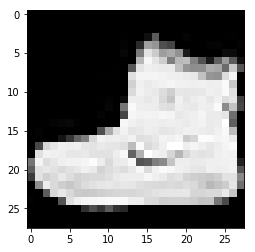

9
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]


In [19]:
plt.imshow(x_train[0,:,:],cmap='Greys_r')
plt.show()
print(y_train[0])
print(encoded_y_train[0])

In [22]:
input_shape = x_train[0,:,:].shape # 28 by 28
model_input = Input(shape=input_shape)